# Duke Breast Cancer dataset reader

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

from load_dataset.dataset_3d import Dataset_3D

%matplotlib inline

phenotypes = {
    0: "Luminal-like",
    1: "ER/PR pos, HER2 pos",
    2: "ER & PR neg, HER2 pos",
    3: "Triple Negative"
}

2022-12-09 15:24:06.301614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 15:24:06.301658: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Read dataset 

In [2]:
dataset = Dataset_3D("/data/mguevaral/crop_bbox", crop_size=(64, 128, 128))

Reading dataset...


### Show some stats about one series of data

In [3]:
print("\nCases/Series: %d" % len(list(dataset.volumes.keys())))
key = list(dataset.volumes.keys())[168]
print("\nExample:\n\nCase/Series: %s" % key)
print("Phenotype: %s => %s" % (
    dataset.volumes[key]["phenotype"], phenotypes[dataset.volumes[key]["phenotype"]]))
print("Number of tumor slices: %d" % len(dataset.volumes[key]["slices"]))
print("List of slices:")
for i in range(len(dataset.volumes[key]["slices"])):
    slice = dataset.volumes[key]["slices"][i]
    print(f"\t{slice}")
volume = dataset.process_scan(key)
print(f"\nVolume shape (after pre-processing): {volume.shape}")


Cases/Series: 3300

Example:

Case/Series: Breast_MRI_800._series#502.000000-Ph2ax 3d dyn-53091#_
Phenotype: 0 => Luminal-like
Number of tumor slices: 15
List of slices:
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#072#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#073#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#074#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#075#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#076#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#077#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#078#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#079#.jpg
	/data/mguevaral/crop_bbox/id#Breast_

### Show a figure with some slices 

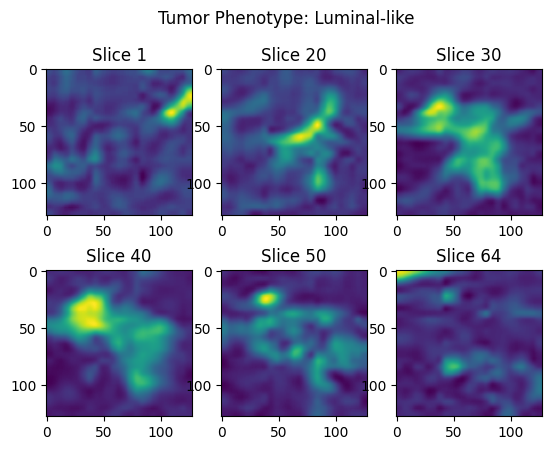

In [5]:
fig = plt.figure()
fig.suptitle("Tumor Phenotype: {}".format(
    phenotypes[dataset.volumes[key]["phenotype"]]))
ax = plt.subplot(2, 3, 1)
ax.title.set_text('Slice 1')
plt.imshow(volume[0, :, :].T)
ax = plt.subplot(2, 3, 2)
ax.title.set_text('Slice 20')
plt.imshow(volume[19, :, :].T)
ax = plt.subplot(2, 3, 3)
ax.title.set_text('Slice 30')
plt.imshow(volume[29, :].T)
ax = plt.subplot(2, 3, 4)
ax.title.set_text('Slice 40')
plt.imshow(volume[39, :, :].T)
ax = plt.subplot(2, 3, 5)
ax.title.set_text('Slice 50')
plt.imshow(volume[49, :, :].T)
ax = plt.subplot(2, 3, 6)
ax.title.set_text('Slice 64')
plt.imshow(volume[63, :, :].T)
plt.show()